# House Price - Linear Regression

## Parte 06 - Machine Learning - Rodagem com todas as variaveis

#### > Importação das Bibliotecas

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd  
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.formula.api import ols
from xgboost import XGBRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### > Carregamento do Dataset

Carregamento do dataset **'house_price.csv'**. O comando 'set_option' permite que a tabela seja apresentada sem simplicação 

In [3]:
df0 = pd.read_csv('house_price.csv')
pd.set_option('max_columns', None)

#### 1. Primeira Rodagem

Nessa primeira rodagem, serão colocados todos os dados do dataset, com a intenção de prever o preço da casa

##### > Separando os Dados

Colocando todas as colunas como variaveis

In [4]:
df = df0.copy()

In [5]:
df.columns

Index(['date', 'day', 'month', 'year', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'age_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19450 entries, 0 to 19449
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19450 non-null  object 
 1   day            19450 non-null  int64  
 2   month          19450 non-null  int64  
 3   year           19450 non-null  int64  
 4   price          19450 non-null  float64
 5   bedrooms       19450 non-null  float64
 6   bathrooms      19450 non-null  float64
 7   sqft_living    19450 non-null  float64
 8   sqft_lot       19450 non-null  float64
 9   floors         19450 non-null  float64
 10  waterfront     19450 non-null  int64  
 11  view           19450 non-null  int64  
 12  condition      19450 non-null  int64  
 13  grade          19450 non-null  int64  
 14  sqft_above     19450 non-null  float64
 15  sqft_basement  19450 non-null  int64  
 16  age_built      19450 non-null  float64
 17  yr_renovated   19450 non-null  int64  
 18  zipcod

Transformando os tipos de variaveis

In [7]:
df['date']=df['date'].astype('datetime64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19450 entries, 0 to 19449
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19450 non-null  datetime64[ns]
 1   day            19450 non-null  int64         
 2   month          19450 non-null  int64         
 3   year           19450 non-null  int64         
 4   price          19450 non-null  float64       
 5   bedrooms       19450 non-null  float64       
 6   bathrooms      19450 non-null  float64       
 7   sqft_living    19450 non-null  float64       
 8   sqft_lot       19450 non-null  float64       
 9   floors         19450 non-null  float64       
 10  waterfront     19450 non-null  int64         
 11  view           19450 non-null  int64         
 12  condition      19450 non-null  int64         
 13  grade          19450 non-null  int64         
 14  sqft_above     19450 non-null  float64       
 15  sqft_basement  1945

Colocando somente os valores proximos no dataset, tentando avaliar se diminuiremos os erros

Colocando as features em uma variavel

In [9]:
X = df[['day', 'month', 'year', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'age_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Colocando a coluna 'price' como nossa variavel resposta

In [10]:
y = df['price']

Realizando a separação dos dados em Treino e Teste, onde 30% dos dados serão de teste

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Metrica para validação dos dados

In [12]:
def acc_reg(y_pred,y_test,tolerancia):
    
    df_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    df_final['error']=1-df_final['Predicted']/df_final['Actual']
    
    ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()
    
    Falso = ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()[0]
    
    Verdadeiro = ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()[1]
    
    Acc = Verdadeiro/(Falso+Verdadeiro)*100
    
    return round(Acc,2)

#### > LinearRegression

##### > Verificação dos resultados

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lrr = r2_score(y_test, y_pred)
MAElr = mean_absolute_error(y_test, y_pred)
MSElr = mean_squared_error(y_test, y_pred)
RMSElr = np.sqrt(mean_squared_error(y_test, y_pred))
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)
print('R^2: %.2f ' % lrr)
print('Mean Absolute error:', MAElr)
print('Mean Squared error:', MSElr )
print('Root Mean Squared Error:', RMSElr )

Coefficient: [-4.38713496e+02  4.32535632e+02  3.08939523e+04 -2.92582934e+04
  3.43032116e+04  9.09084576e+01 -8.14230106e-01  1.47624813e+04
  4.97387093e+05  5.29916322e+04  2.91594998e+04  1.02714385e+05
  5.64091437e+01  3.44993137e+01  2.60387270e+03  1.96819872e+01
 -4.97240895e+02  5.99594017e+05 -1.62699358e+05  3.87076634e+01
 -2.28092951e+00]
Intercept: -62684928.536653236
R^2: 0.71 
Mean Absolute error: 112586.47754043472
Mean Squared error: 28571963503.450996
Root Mean Squared Error: 169032.43328855856


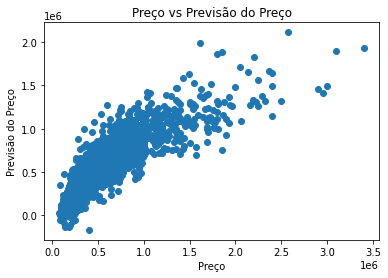

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [15]:
lrp = acc_reg(y_pred,y_test,0.1)
lrp

29.79

In [16]:
Linear = ['LinearRegression',lrr,MAElr,MSElr,RMSElr,lrp]
Linear

['LinearRegression',
 0.7091342860350951,
 112586.47754043472,
 28571963503.450996,
 169032.43328855856,
 29.79]

#### > KNN Regressor

##### > Verificação dos resultados

In [17]:
knn = KNeighborsRegressor(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knnr = r2_score(y_test, y_pred)
MAEknn = mean_absolute_error(y_test, y_pred)
MSEknn = mean_squared_error(y_test, y_pred)
RMSEknn = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % knnr)
print('Mean Absolute error:', MAEknn)
print('Mean Squared error:', MSEknn )
print('Root Mean Squared Error:', RMSEknn )

R^2: 0.52 
Mean Absolute error: 144521.75537275063
Mean Squared error: 47341577183.70815
Root Mean Squared Error: 217581.19676044653


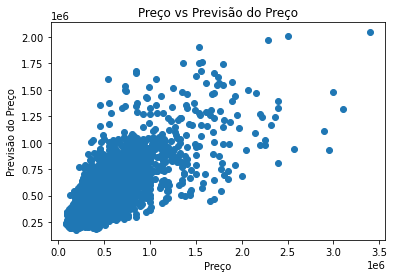

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [19]:
knnp = acc_reg(y_pred,y_test,0.1)
knnp

23.03

In [20]:
KNN = ['KNN Regressor',knnr,MAEknn,MSEknn,RMSEknn,knnp]
KNN

['KNN Regressor',
 0.518057565553703,
 144521.75537275063,
 47341577183.70815,
 217581.19676044653,
 23.03]

#### > Decision Tree

##### > Verificação dos resultados

In [21]:
dct = DecisionTreeRegressor(random_state=42)
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)
dtr = r2_score(y_test, y_pred)
MAEdt = mean_absolute_error(y_test, y_pred)
MSEdt = mean_squared_error(y_test, y_pred)
RMSEdt = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % dtr)
print('Mean Absolute error:', MAEdt)
print('Mean Squared error:', MSEdt )
print('Root Mean Squared Error:', RMSEdt )

R^2: 0.74 
Mean Absolute error: 92926.2997429306
Mean Squared error: 26014158130.09717
Root Mean Squared Error: 161289.05148861522


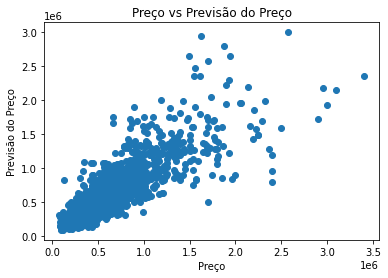

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [23]:
dtp = acc_reg(y_pred,y_test,0.1)
dtp

41.65

In [24]:
DT = ['Decision Tree',dtr,MAEdt,MSEdt,RMSEdt,dtp]
DT

['Decision Tree',
 0.7351730245353025,
 92926.2997429306,
 26014158130.09717,
 161289.05148861522,
 41.65]

#### > Random Forest

##### > Verificação dos resultados

In [25]:
rft = RandomForestRegressor(n_estimators=100, random_state=26)
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)
rfr = r2_score(y_test, y_pred)
MAErf = mean_absolute_error(y_test, y_pred)
MSErf = mean_squared_error(y_test, y_pred)
RMSErf = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % rfr)
print('Mean Absolute error:', MAErf)
print('Mean Squared error:', MSErf )
print('Root Mean Squared Error:', RMSErf )

R^2: 0.87 
Mean Absolute error: 64728.32106169666
Mean Squared error: 13164807812.264921
Root Mean Squared Error: 114737.99637550292


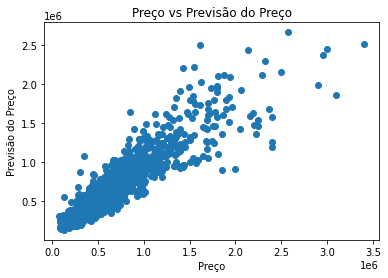

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [27]:
rfp = acc_reg(y_pred,y_test,0.1)
rfp

56.32

In [28]:
RF = ['Random Forest',rfr,MAErf,MSErf,RMSErf,rfp]
RF

['Random Forest',
 0.8659808163669713,
 64728.32106169666,
 13164807812.264921,
 114737.99637550292,
 56.32]

#### > Bagging

##### > Verificação dos resultados

In [29]:
bag_base = DecisionTreeRegressor(random_state=26)
bag = BaggingRegressor(base_estimator=bag_base, n_estimators=10, random_state=26)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
bagr = r2_score(y_test, y_pred)
MAEbag = mean_absolute_error(y_test, y_pred)
MSEbag = mean_squared_error(y_test, y_pred)
RMSEbag = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % bagr)
print('Mean Absolute error:', MAEbag)
print('Mean Squared error:', MSEbag )
print('Root Mean Squared Error:', RMSEbag)

R^2: 0.85 
Mean Absolute error: 68970.19809768639
Mean Squared error: 14746022412.591389
Root Mean Squared Error: 121433.20144256837


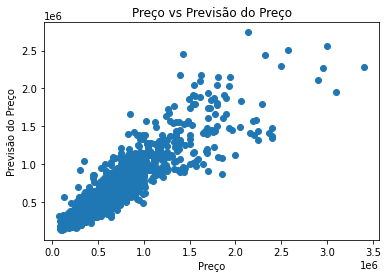

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [31]:
bagp = acc_reg(y_pred,y_test,0.1)
bagp

53.29

In [32]:
BAG = ['Bagging',bagr,MAEbag,MSEbag,RMSEbag,bagp]
BAG

['Bagging',
 0.8498838787658807,
 68970.19809768639,
 14746022412.591389,
 121433.20144256837,
 53.29]

#### > Ensemble

##### > Verificação dos resultados

In [33]:
rft2 = RandomForestRegressor(n_estimators=10, random_state=26)
ens = VotingRegressor([('LR', lr), ('RF', rft2)])
ens.fit(X_train, y_train)
y_pred = ens.predict(X_test)
ensr = r2_score(y_test, y_pred)
MAEens = mean_absolute_error(y_test, y_pred)
MSEens = mean_squared_error(y_test, y_pred)
RMSEens = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % ensr)
print('Mean Absolute error:', MAEens)
print('Mean Squared error:', MSEens )
print('Root Mean Squared Error:', RMSEens)

R^2: 0.83 
Mean Absolute error: 79634.46569725533
Mean Squared error: 16610484296.605648
Root Mean Squared Error: 128881.66780658004


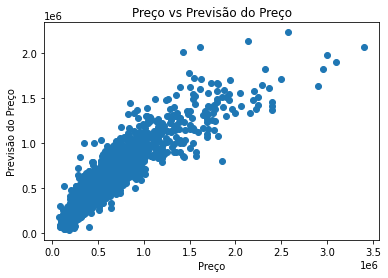

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [35]:
ensp = acc_reg(y_pred,y_test,0.1)
ensp

42.52

In [36]:
ENS = ['Ensemble',ensr,MAEens,MSEens,RMSEens,ensp]
ENS

['Ensemble',
 0.8309034528323022,
 79634.46569725533,
 16610484296.605648,
 128881.66780658004,
 42.52]

#### > Gradient Boosting Regressor

##### > Verificação dos resultados

In [37]:
gbos = GradientBoostingRegressor(max_depth=7,random_state=42)
gbos.fit(X_train, y_train)
y_pred = gbos.predict(X_test)
gbosr = r2_score(y_test, y_pred)
MAEgbos = mean_absolute_error(y_test, y_pred)
MSEgbos = mean_squared_error(y_test, y_pred)
RMSEgbos = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % gbosr)
print('Mean Absolute error:', MAEgbos)
print('Mean Squared error:', MSEgbos )
print('Root Mean Squared Error:', RMSEgbos)

R^2: 0.89 
Mean Absolute error: 60701.362512435524
Mean Squared error: 11181357959.596449
Root Mean Squared Error: 105741.94040018582


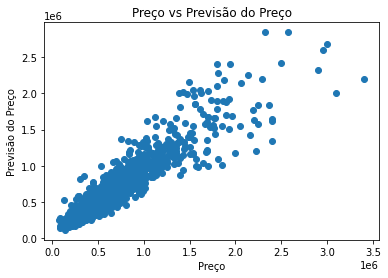

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [39]:
gbosp = acc_reg(y_pred,y_test,0.1)
gbosp

57.12

In [40]:
GBOS = ['Gradient Boosting',gbosr,MAEgbos,MSEgbos,RMSEgbos,gbosp]
GBOS

['Gradient Boosting',
 0.8861725528375963,
 60701.362512435524,
 11181357959.596449,
 105741.94040018582,
 57.12]

#### > XGBoost Regressor

##### > Verificação dos resultados

In [41]:
xgb = XGBRegressor(max_depth=4,random_state=42).fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgbr = r2_score(y_test, y_pred)
MAExgb = mean_absolute_error(y_test, y_pred)
MSExgb = mean_squared_error(y_test, y_pred)
RMSExgb = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % xgbr)
print('Mean Absolute error:', MAExgb)
print('Mean Squared error:', MSExgb )
print('Root Mean Squared Error:', RMSExgb)

R^2: 0.88 
Mean Absolute error: 64889.97992046915
Mean Squared error: 11601379481.751278
Root Mean Squared Error: 107709.70003556447


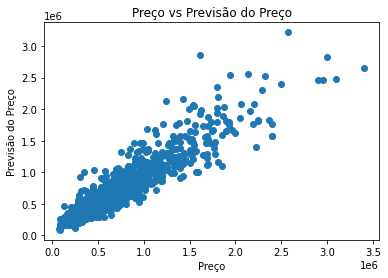

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [50]:
xgbp = acc_reg(y_pred,y_test,0.1)
xgbp

53.19

In [51]:
XGB = ['XGBoost Regressor',xgbr,MAExgb,MSExgb,RMSExgb,xgbp]
XGB

['XGBoost Regressor',
 0.8818966877957194,
 64889.97992046915,
 11601379481.751278,
 107709.70003556447,
 53.19]

#### > OLS

##### > Verificação dos resultados

In [45]:
m=ols('price~day+month+year+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+age_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2268.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:29:44   Log-Likelihood:            -2.6207e+05
No. Observations:               19450   AIC:                         5.242e+05
Df Residuals:                   19429   BIC:                         5.244e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.811e+07   9.05e+06     -6.418

In [46]:
Qua = pd.DataFrame([Linear,KNN,DT,RF,BAG,ENS,GBOS,XGB],columns=['TIPO','R²','MAE','MSE','RMSE','ACURACIA %'])
Qua

,TIPO,R²,MAE,MSE,RMSE,ACURACIA %
0,LinearRegression,0.709134,112586.477540,2.857196e+10,169032.433289,29.79
1,KNN Regressor,0.518058,144521.755373,4.734158e+10,217581.196760,23.03
2,Decision Tree,0.735173,92926.299743,2.601416e+10,161289.051489,41.65
3,Random Forest,0.865981,64728.321062,1.316481e+10,114737.996376,56.32
4,Bagging,0.849884,68970.198098,1.474602e+10,121433.201443,53.29
5,Ensemble,0.830903,79634.465697,1.661048e+10,128881.667807,42.52
6,Gradient Boosting,0.886173,60701.362512,1.118136e+10,105741.940400,57.12
7,XGBoost Regressor,0.881897,64889.979920,1.160138e+10,107709.700036,53.19
